In [2]:
import qutip as qt
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm

"""Qutip functions:

Displacement operator:  displace(N,alpha), alpha real is in x direction, imaginary in p direction
Squeezing:              squeez(N, z) exp(1/2 (z^* a^2 + z * a^dag^2)), z = r*e^(i phi)
                        squeezing(q1, q2, z) is a general squeezer for operators q1 and q2
Coherent state:         coherent(N,alpha)
Fock state:             fock(N,#m)
a and a^ dag:           create(N), destroy(N)
"""

'Qutip functions:\n\nDisplacement operator:  displace(N,alpha), alpha real is in x direction, imaginary in p direction\nSqueezing:              squeez(N, z) exp(1/2 (z^* a^2 + z * a^dag^2)), z = r*e^(i phi)\n                        squeezing(q1, q2, z) is a general squeezer for operators q1 and q2\nCoherent state:         coherent(N,alpha)\nFock state:             fock(N,#m)\na and a^ dag:           create(N), destroy(N)\n'

In [3]:
def occupation_plot(state, N):
    fig, axes = plt.subplots(1, 1, figsize=(5,5))
    bar0 = axes.bar(np.arange(N), np.real(state.full()[:N,0]))
    lbl0 = axes.set_title("Occupation")
    lim0 = axes.set_xlim([-.5, N+0.5])
    plt.show()

In [4]:
def Wigner_plot(state):
    xvec = np.linspace(-5,5,100)
    W_coherent = qt.wigner(state, xvec, xvec, g=2)
    nrm = mpl.colors.Normalize(W_coherent.min(), W_coherent.max())
    fig, axes = plt.subplots(1, 1, figsize=(5,5))
    cont0 = axes.contourf(xvec, xvec, W_coherent, 100, cmap=cm.RdBu)
    lbl0 = axes.set_title("Coherent state")
    plt.show()

In [5]:
#Max Fock dimension
N = 20
#Initial state Vacuum
vacuum = qt.fock(N,0)
#displace in x direction
alpha = qt.displace(N, 1)*vacuum
alpha2 = qt.coherent(N, 1) # is the same as displacing the vacuum

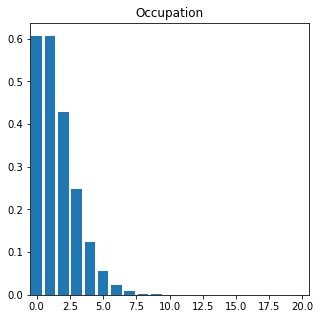

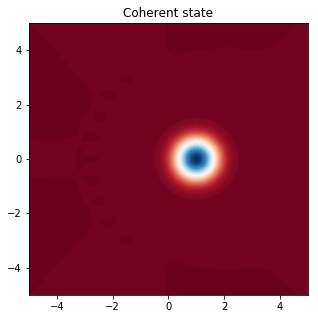

In [6]:
occupation_plot(alpha2, N)
Wigner_plot(alpha)

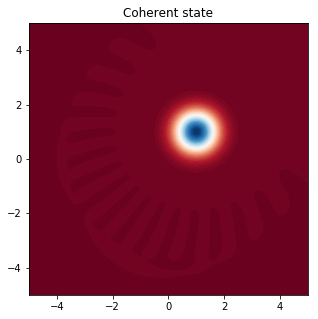

In [7]:
#Displacement in y axis is with imaginary values for alpha
Wigner_plot(qt.displace(N, 1j)*alpha)

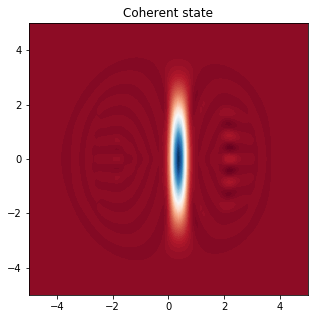

In [17]:
# Squeezing with real values for z = r*e^(i phi) either squeeze the state in x direction for positive r 
# or in y direction for negative r. It does not matter, where in the plane the state is.
# positive imginary values squeez the state along the f(x)=-x axis. And negative values squeez it 
# along the f(x) = x axis
Wigner_plot(qt.squeeze(N, 1.0)*qt.coherent(N,1.0))

**Be aware, that squeezing does not conserve the mean value of the amplitude!**

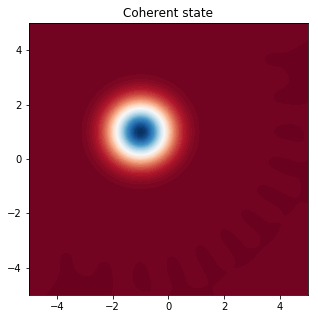

In [252]:
# Roitation
# exp(i phi a^dag a)
# Xanadu convention is positive values of phi rotate counterclockwise
def rotation(op, phi):
    return (1j * op * phi).expm()

phi = np.pi*3/4
adag_a = qt.destroy(N)*qt.create(N)
Wigner_plot(rotation(adag_a, phi)*qt.coherent(N,1))

In [332]:
# Beamsplitter
# takes two modes and applies operator on it
# At this point we assume all the modes have the same local dimension N
def beamsplitter(Theta, phi, max_modes, mode1, mode2, N):
    """
    - Theta and phi are the parameters of the Beam Splitter (BS)
    - max_modes gives the number of modes of the whole system
    - mode1 and mode2 indicates the modes the BS is applied on
    - N is the maximum local dimension (cut-off dimension)
    - a 50/50 beamsplitter has Theta = pi/4"""
    mode1_list = []
    mode2_list = []
    for i in range(max_modes):
        if mode1-1 == i:
            mode1_list.append(qt.create(N))
        else:
            mode1_list.append(qt.qeye(N))
            
        if mode2-1 == i:
            mode2_list.append(qt.create(N))
        else:
            mode2_list.append(qt.qeye(N))
        #(1j * op * phi).expm()
        op1 = qt.tensor(mode1_list)
        op2 = qt.tensor(mode2_list)
    return (Theta*(np.exp(1j*phi)*op1.dag()*op2 - np.exp(-1j*phi)*op1*op2.dag())).expm()

N = 2
Theta = np.pi/2
phi = 0.0
a = beamsplitter(Theta,phi,2,1,2, N)
state1 = qt.fock(N,1)
state2 = qt.fock(N,0)
state = qt.tensor(state1, state2)
#state = state1 + state2
print(a*state)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]
